# Matplotlib Tutorial

信息可视化（ 也叫绘图） 是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。

matplotlib是一个用于创建出版质量图表的桌面绘图包（ 主要是2D方面） 。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。matplotlib和IPython社区进行合作，简化了从IPython shell（ 包括现在的Jupyter notebook） 进行交互式绘图。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（ vector） 和光栅（ raster） 图：PDF、SVG、JPG、PNG、BMP、GIF等。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn

## 一、matplotlib API入门

Matplotlib有两个接口

* 第一个是面向对象（OO）接口。在这种情况下，我们利用 axes.Axes 的实例，以便在figure.Figure的实例上呈现可视化。

* 第二种是基于MATLAB并使用基于状态的接口。这封装在pyplot模块中。请参阅pyplot教程，以深入了解pyplot界面。

在Jupyter notebook进行交互式绘图。在Jupyternotebook中执行下面的语句：

In [2]:
%matplotlib notebook

In [3]:
# 引入约定
import matplotlib.pyplot as plt

在Jupyter中运行%matplotlib notebook（ 或在IPython中运行%matplotlib） ，就可以创建一个简单的图形。

In [4]:
import numpy as np

In [5]:
data = np.arange(10)

<IPython.core.display.Javascript object>


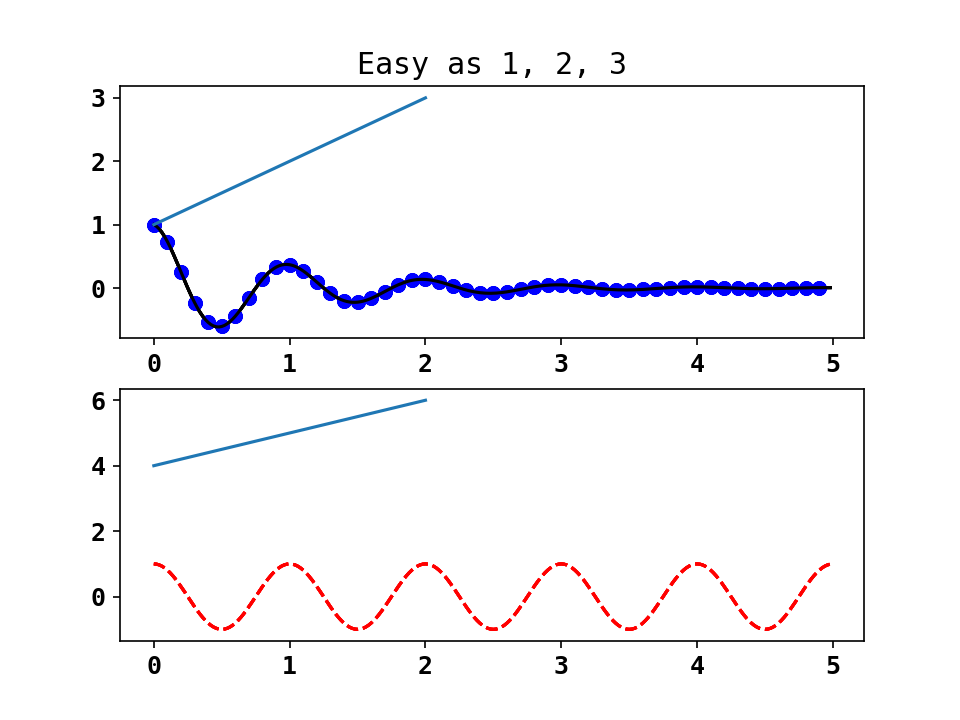

In [7]:
plt.plot(data)

### 1.1 Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure。

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行

<IPython.core.display.Javascript object>


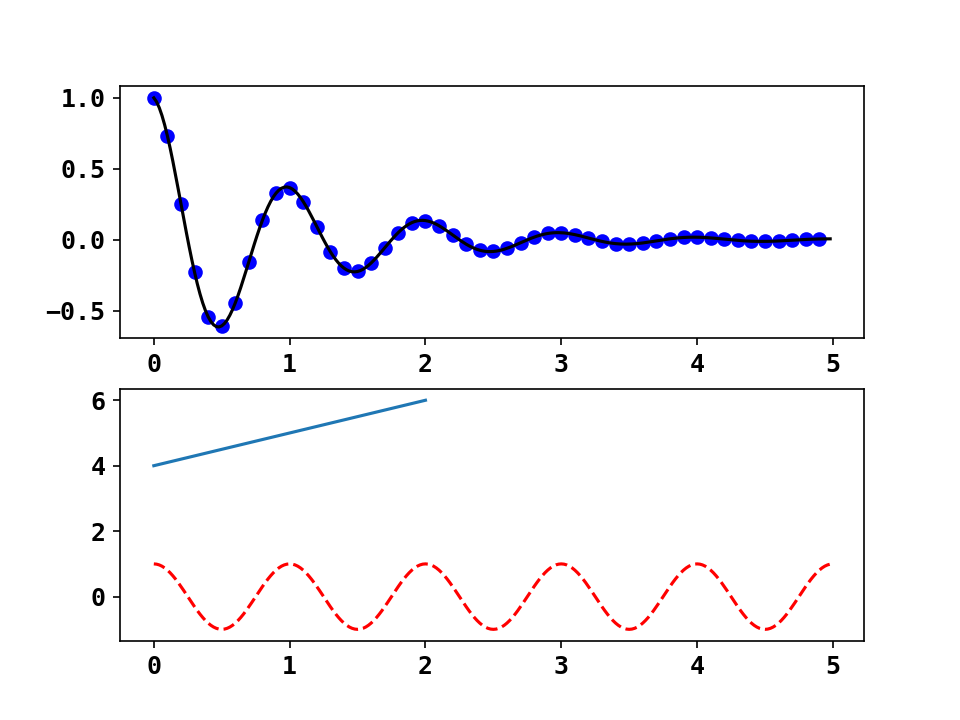

In [9]:
fig = plt.figure()

# 图像应该是2×2的（ 即最多4张图），且当前选中的是4个subplot中的第一个（ 编号从1开始）。
ax1 = fig.add_subplot(2, 2, 1)
ax4 = fig.add_subplot(2, 2, 4)

使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。
因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里

如果这时执行一条绘图命令（ 如plt.plot([1.5, 3.5, -2, 1.6])） ，matplotlib就会在最后一个用过的subplot（ 如果没有则创建一个） 上进行绘制，隐藏创建figure和subplot的过程。

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了

In [11]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax4.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

对同一个AxesSubplot对象，绘制多次，则可以在同一个对象上，增加多个系列

matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组

<IPython.core.display.Javascript object>


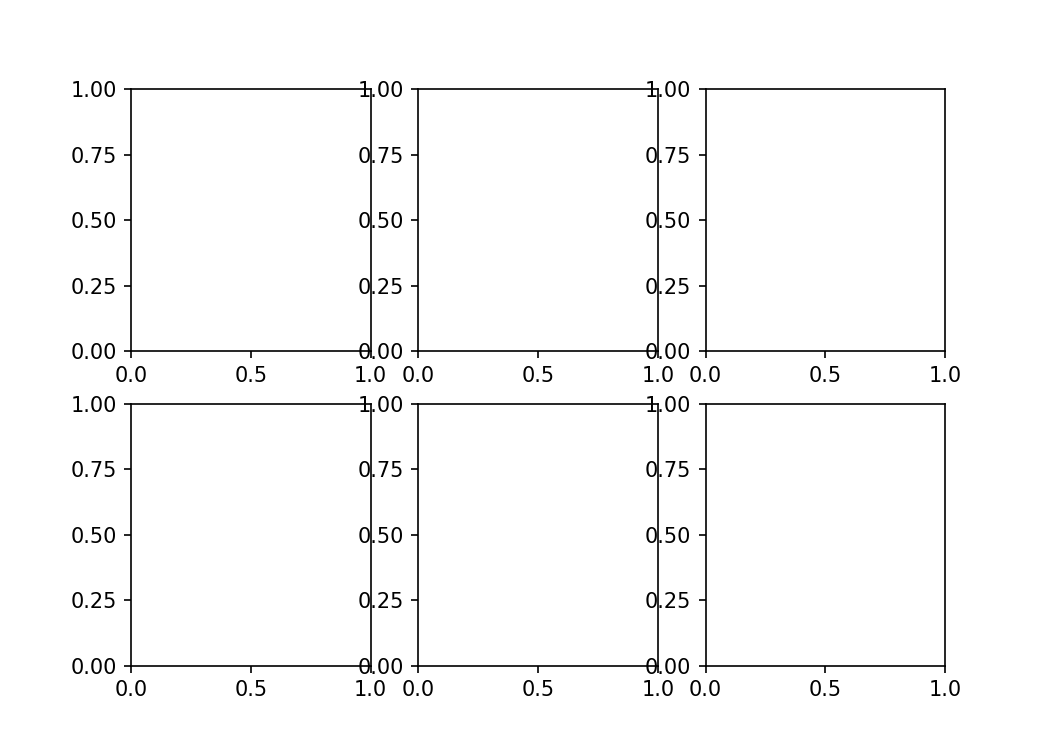

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021438E68CC0>,
      dtype=object)

In [12]:
fig, axes = plt.subplots(2, 3)
axes

可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

1、调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（ 不管是编程还是手工） ，间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数

```
subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
```

<IPython.core.display.Javascript object>


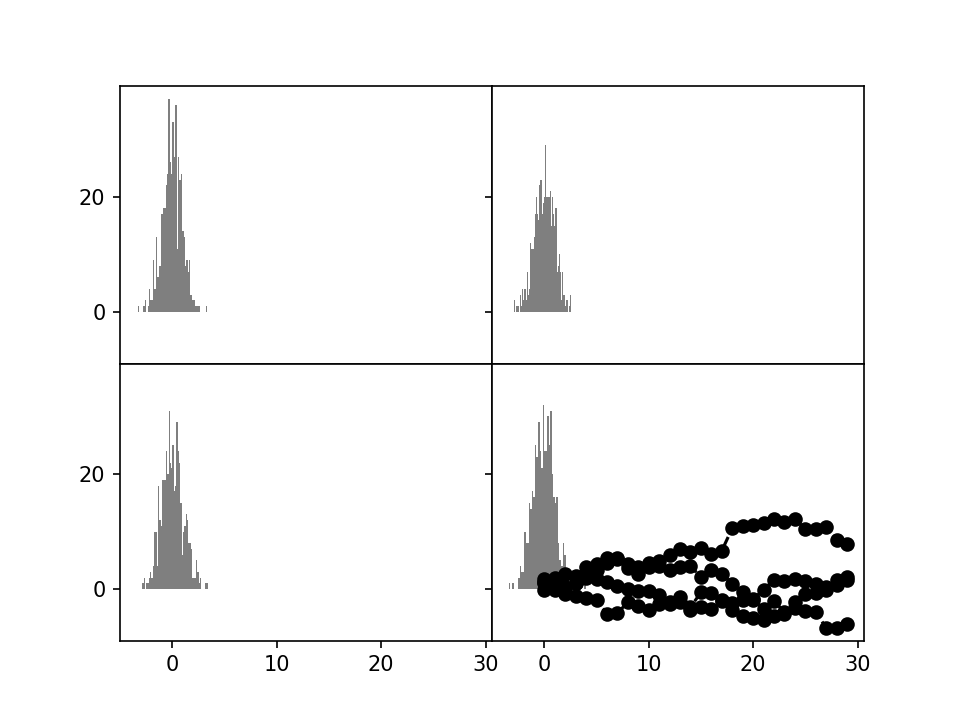

In [13]:
# wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。

2、颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线.
```
ax.plot(x, y, 'g--')
```

常用的颜色可以使用颜色缩写，你也可以指定颜色码（ 例如，'#CECECE'）。

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面。

In [16]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [18]:
# 或以明确的形式
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


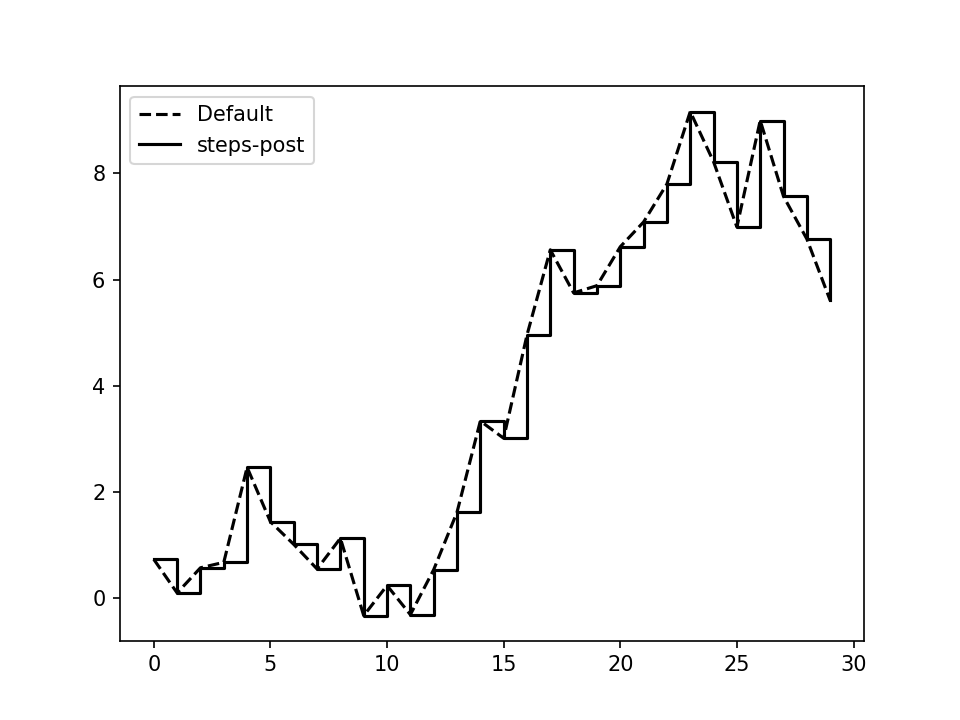

In [19]:
# 在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改
fig1 = plt.figure()

# 图像应该是2×2的（ 即最多4张图），且当前选中的是4个subplot中的第一个（ 编号从1开始）。
ax1 = fig1.add_subplot(1, 1, 1)
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

你必须调用plt.legend（ 或使用ax.legend，如果引用了轴的话） 来创建图例，无论你绘图时是否传递label标签选项。

2、刻度、标签和图例

图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（ 例如，matplotlib.pyplot） 以及更为面向对象的原生matplotlib API

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：
* 调用时不带参数，则返回当前的参数值（ 例如，plt.xlim()返回当前的X轴绘图范围） 。
* 调用时带参数，则设置参数值（ 例如，plt.xlim([0,10])会将X轴的范围设置为0到10） 。

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法。

<IPython.core.display.Javascript object>


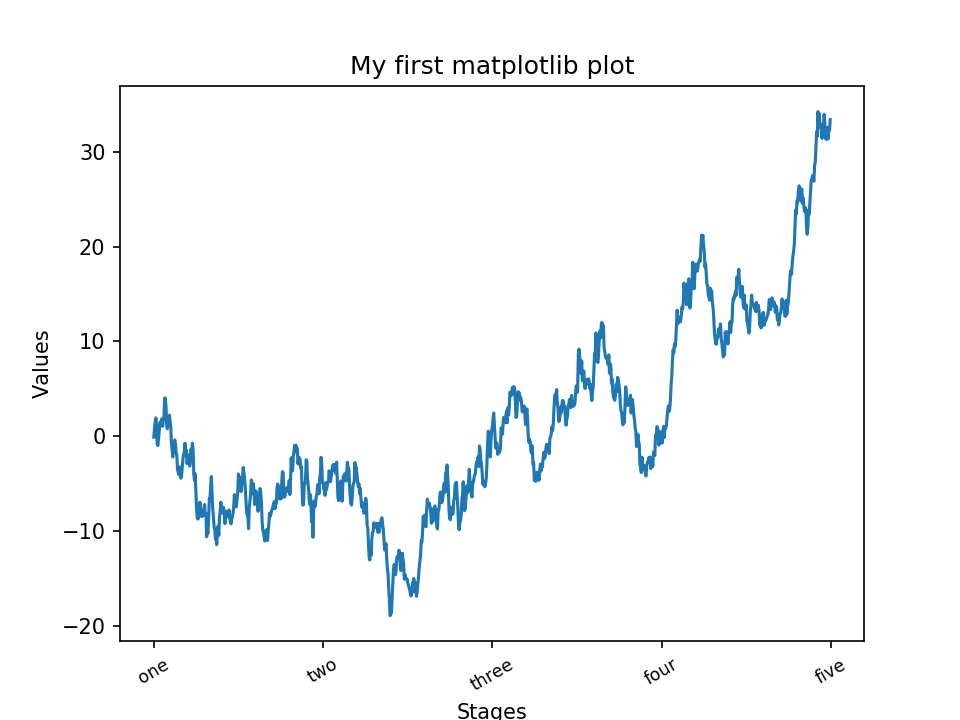

Text(0,0.5,'Values')

In [22]:
# 设置标题、轴标签、刻度以及刻度标签
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，
# 并用set_title设置一个标题
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Values')

也可以批量设置参数

```
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}a
x.set(**props)
```

<IPython.core.display.Javascript object>


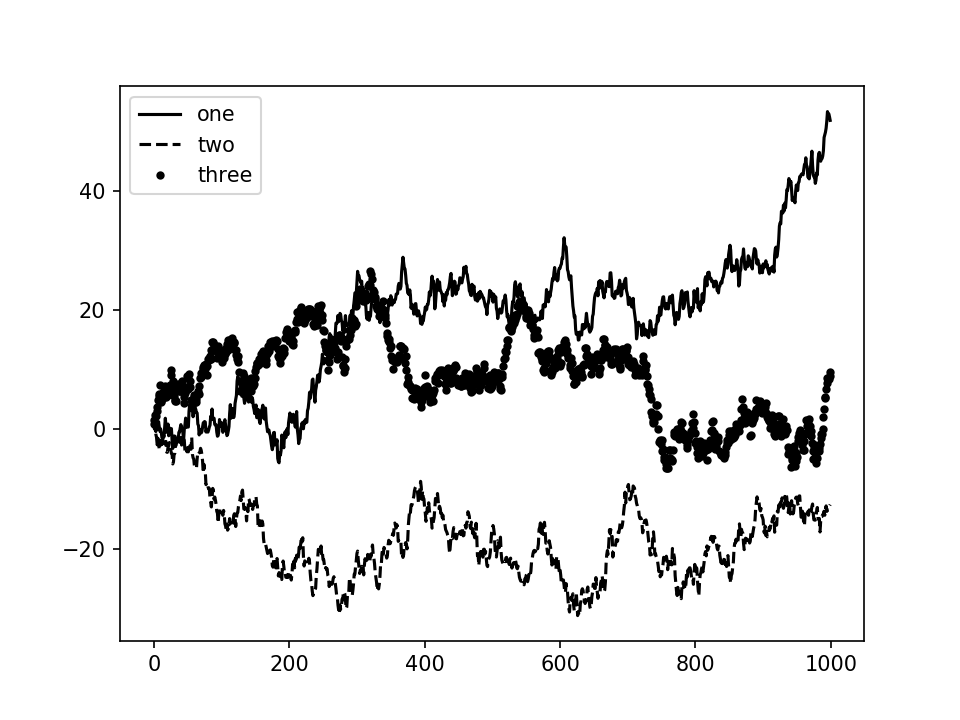

In [23]:
# 图例（ legend） 是另一种用于标识图表元素的重要工具。
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# 可以调用ax.legend()或plt.legend()来自动创建图例
ax.legend(loc='best')
#要从图例中去除一个或多个元素，不传入label或传入label='nolegend'即可。

3、注解以及在Subplot上绘图

除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

```
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


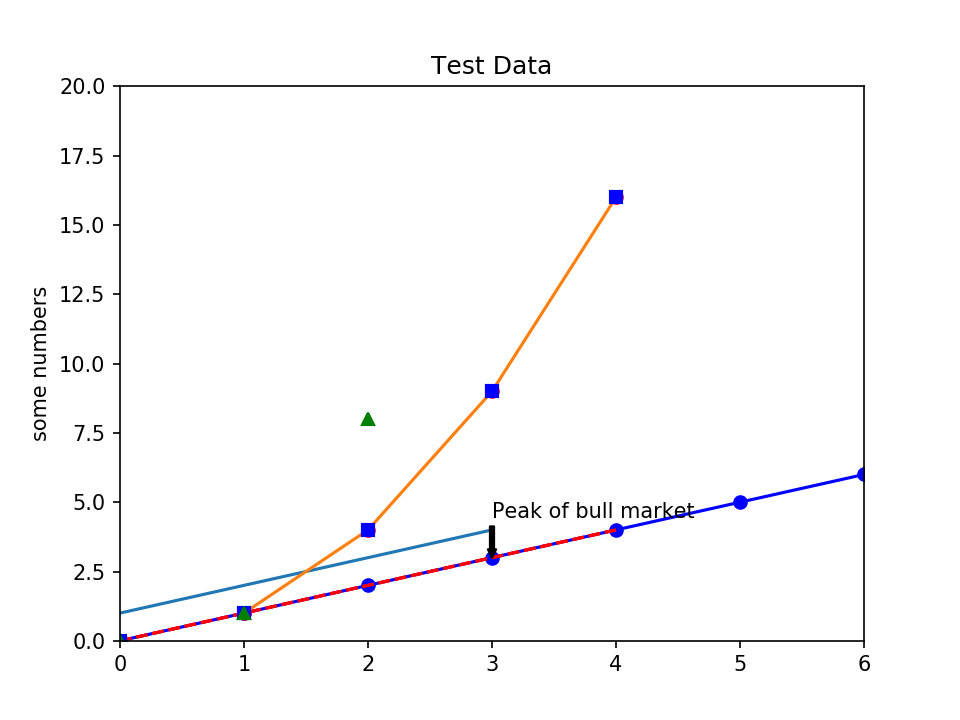

Text(0.5,1,'Test Data')

In [40]:
# 注解中可以既含有文本也含有箭头。
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

import pandas as pd

spx = pd.Series(np.arange(10))
spx.plot(ax=ax, style='b-o')

crisis_data = [
    (3, 'Peak of bull market'),
    (7, 'Bear Stearns Fails'),
    (9, 'Lehman Bankruptcy')
    ] 

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)),
                xytext=(date, spx.asof(date)+2),
                arrowprops=dict(facecolor='black', headwidth=4,width=2, headlength=4), 
                horizontalalignment='left', verticalalignment='top')

    
# Zoom in on 2007-2010
ax.set_xlim([-1, 12])
ax.set_ylim([-1, 12])
ax.set_title('Test Data')

# ax.annotate方法可以在指定的x和y坐标轴绘制标签。
# 我们使用set_xlim和set_ylim人工设定起始和结束边界，而不使用matplotlib的默认方法。最后，用ax.set_title添加图标标题。

4、将图表保存到文件

In [41]:
# 利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。
# 例如，要将图表保存为SVG文件，你只需输入：
plt.savefig('figpath.svg')

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（ 控制“每英寸点数”分辨率） 和bbox_inches（ 可以剪除当前图表周围的空白部分） 。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：

In [42]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [43]:
# savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

savefig的其他选项

|参数|说明|
|---|---|
|fname|含有文件路径的字符串或Python的文件型对象。图像格式由文件扩展名推断得出。|
|dpi|图像分辨率（每英寸点数），默认为100|
|facecolor、edgecolor|图像的背景眼神，默认为'w'（白色）|
|format|显式设置文件格式（'png'、'pdf'、'svg'....）|
|bbox_inches|图表需要保存的部分。如果设置为'tight'，则尝试剪除图标周卫的空白部分|

5、matplotlib全局配置

matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。一种Python编程方式配置系统的方法是使用rc方法。

In [44]:
# 例如，要将全局的图像默认大小设置为10×10，你可以执行：
plt.rc('figure', figsize=(10, 10))

rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：

In [46]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 12}
plt.rc('font', **font_options)

In [68]:
# Matplotlib中有许多样式可供您根据需要定制可视化
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [69]:
# 激活样式
plt.style.use('fivethirtyeight')

6、例子介绍

<IPython.core.display.Javascript object>


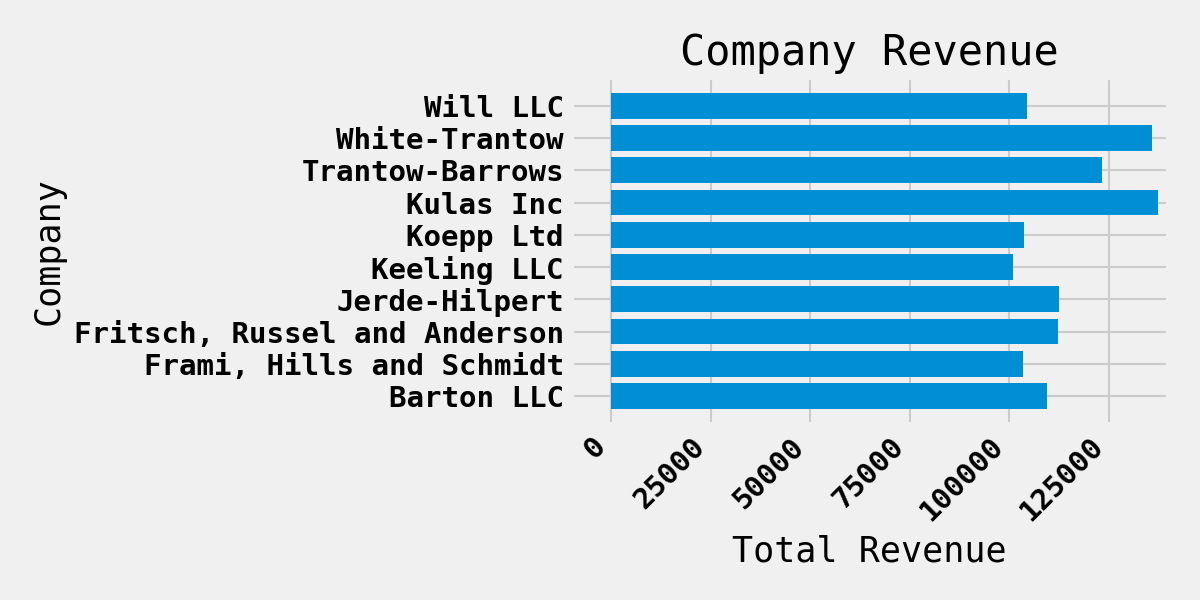

[Text(0,0.5,'Company'),
 (-10000, 140000),
 Text(0.5,0,'Total Revenue'),
 Text(0.5,1,'Company Revenue')]

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

# 切断底部的一些标签。我们可以告诉Matplotlib自动为我们创建的图中的元素腾出空间。
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
# 想一次设置多个项的属性，那么使用pyplot.setp()函数会很有用
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')




<IPython.core.display.Javascript object>


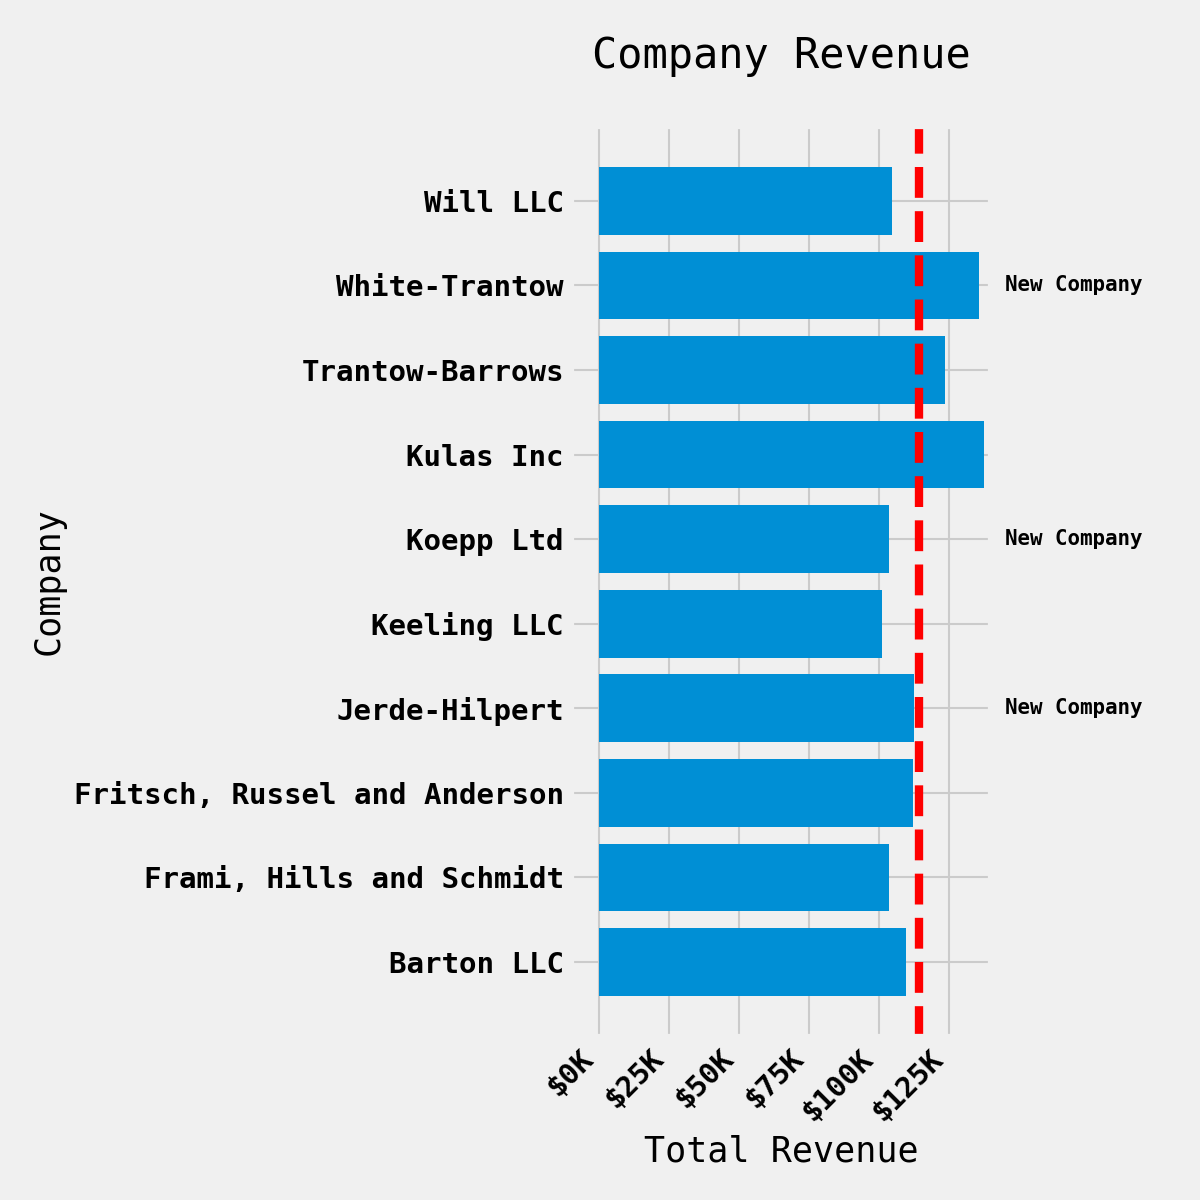

In [81]:
# 结合多个可视化
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

# 对于标签，我们可以使用ticker.FuncFormatter类以函数的形式指定自定义格式指南。 
# 下面我们将定义一个以整数作为输入的函数，并返回一个字符串作为输出。
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

## 二、matplotlib 操作

### 2.1 pyplot 简介

matplotlib.pyplot 是命令样式函数的集合，使matplotlib像MATLAB一样工作。 每个pyplot函数对图形进行一些更改：例如，创建图形，在图形中创建绘图区域，在绘图区域中绘制一些线条，用标签装饰图形等。

在matplotlib.pyplot中，各种状态在函数调用中保留，以便跟踪当前图形和绘图区域等内容，并且绘图函数指向当前轴（请注意“轴”在此处以及在大多数位置 文档是指图形的轴部分，而不是多个轴的严格数学术语。

注意: pyplot API通常不如面向对象的API灵活。您在此处看到的大多数函数调用也可以作为Axes对象中的方法调用。 我们建议您浏览教程和示例以了解其工作原理。

<IPython.core.display.Javascript object>


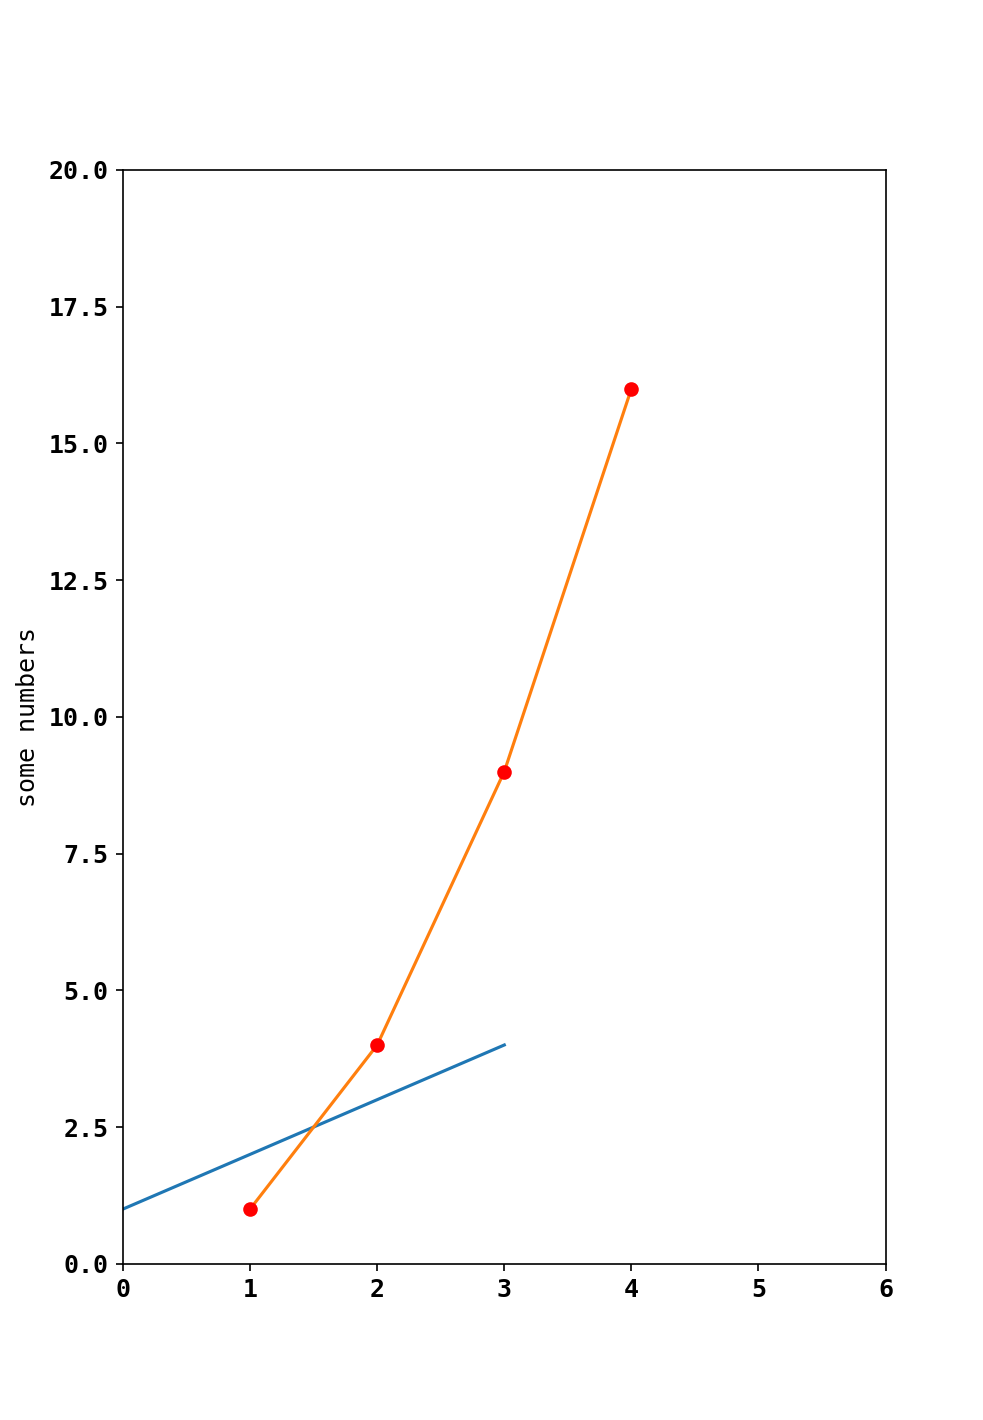

In [49]:
# 简单示例
# 避免和上面其他图影响，重新创建图
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [50]:
# 制定X和Y轴
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

In [52]:
# 对于每对x，y对的参数，有一个可选的第三个参数，它是指示绘图的颜色和线型的格式字符串。
# 格式字符串的字母和符号来自MATLAB，您可以将颜色字符串与线型字符串连接起来。默认格式字符串为“b-”，为蓝色实线

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
#  axis() 命令采用 [xmin, xmax, ymin, ymax] 列表并指定轴的视口。
plt.axis([0, 6, 0, 20])
plt.show()

In [54]:
# 同一数据绘制多行。使用数组在一个命令中绘制具有不同格式样式的多行
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

1、处理多个图形和轴域

线条有许多你可以设置的属性：linewidth，dash style，antialiased等，请参见matplotlib.lines.Line2D。 有几种方法可以设置线属性：

* 使用关键字参数

```
plt.plot(x, y, linewidth=2.0)
```

* 使用Line2D实例的setter方法

```
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising
```

* 用setp()命令.setp使用对象列表或单个对象透明地工作。 你可以使用 python 关键字参数或 MATLAB 风格的字符串/值对：

```
lines = plt.plot(x1, y1, x2, y2)
# 使用关键字参数
plt.setp(lines, color='r', linewidth=2.0)
# 或者 MATLAB 风格的字符串值对
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```




可用的Line2D属性:

| 属性                     | 值类型                                        |
| ------------------------ | --------------------------------------------- |
| `alpha`                  | 浮点值                                        |
| `animated`               | `[True / False]`                              |
| `antialiased or aa`      | `[True / False]`                              |
| `clip_box`               | `matplotlib.transform.Bbox` 实例              |
| `clip_on`                | `[True / False]`                              |
| `clip_path`              | `Path` 实例， `Transform`，以及`Patch`实例    |
| `color or c`             | 任何 `matplotlib` 颜色                        |
| `contains`               | 命中测试函数                                  |
| `dash_capstyle`          | `['butt' / 'round' / 'projecting']`           |
| `dash_joinstyle`         | `['miter' / 'round' / 'bevel']`               |
| `dashes`                 | 以点为单位的连接/断开墨水序列                 |
| `data`                   | `(np.array xdata, np.array ydata)`            |
| `figure`                 | `matplotlib.figure.Figure` 实例               |
| `label`                  | 任何字符串                                    |
| `linestyle` or `ls`      | `[ '-' / '--' / '-.' / ':' / 'steps' / ...]`  |
| `linewidth` or `lw`      | 以点为单位的浮点值                            |
| `lod`                    | `[True / False]`                              |
| `marker`                 | `[ '+' / ',' / '.' / '1' / '2' / '3' / '4' ]` |
| `markeredgecolor or mec` | 任何 `matplotlib` 颜色                        |
| `markeredgewidth or mew` | 以点为单位的浮点值                            |
| `markerfacecolor or mfc` | 任何 `matplotlib` 颜色                        |
| `markersize or ms`       | 浮点值                                        |
| `markevery`              | `[ None / 整数值 / (startind, stride) ]`      |
| `picker`                 | 用于交互式线条选择                            |
| `pickradius`             | 线条的拾取选择半径                            |
| `solid_capstyle`         | `['butt' / 'round' / 'projecting']`           |
| `solid_joinstyle`        | `['miter' / 'round' / 'bevel']`               |
| `transform`              | `matplotlib.transforms.Transform` 实例        |
| `visible`                | `[True / False]`                              |
| `xdata`                  | `np.array`                                    |
| `ydata`                  | `np.array`                                    |
| `zorder`                 | 任何数值                                      |

要获取可设置的线条属性的列表，请以一个或多个线条作为参数调用`step()`函数.

2、处理多个图形和轴域

MATLAB 和 pyplot 具有当前图形和当前轴域的概念。 所有绘图命令适用于当前轴域。 函数gca()返回当前轴域（一个matplotlib.axes.Axes实例），gcf()返回当前图形（matplotlib.figure.Figure实例）。

<IPython.core.display.Javascript object>


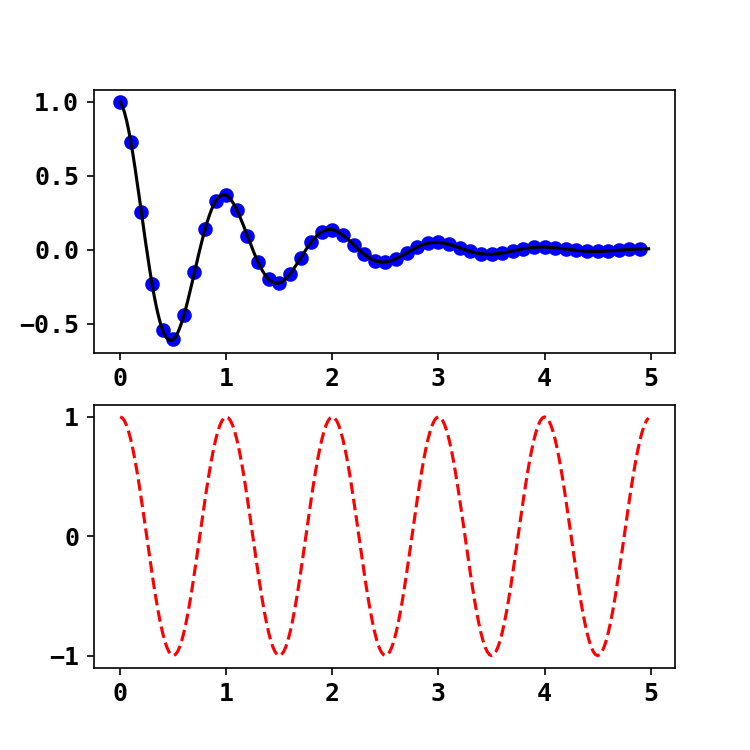

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# 避免和上面其他图影响，重新创建图
#fig = plt.figure()
plt.rc('figure', figsize=(5, 5))
plt.figure(20)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

这里的figure()命令是可选的，因为默认情况下将创建figure(1)，如果不手动指定任何轴域，则默认创建subplot(111)。subplot()命令指定numrows，numcols，fignum，其中fignum的范围是从1到numrows * numcols。 如果numrows * numcols <10，则subplot命令中的逗号是可选的。 因此，子图subplot(211)与subplot(2, 1, 1)相同。 你可以创建任意数量的子图和轴域。 如果要手动放置轴域，即不在矩形网格上，请使用axes()命令，该命令允许你将axes([left, bottom, width, height])指定为位置，其中所有值都使用小数（0 到 1）坐标。

<IPython.core.display.Javascript object>


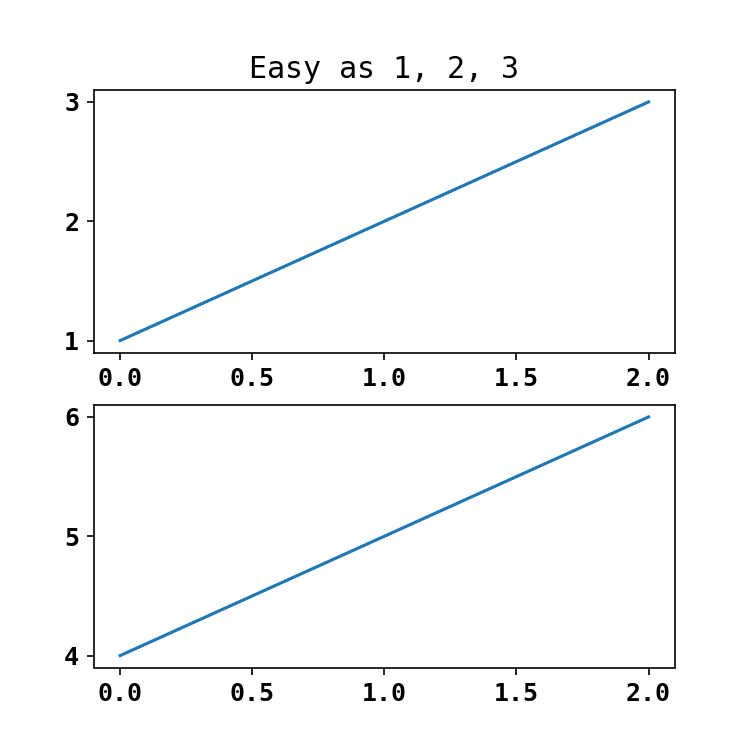

<IPython.core.display.Javascript object>


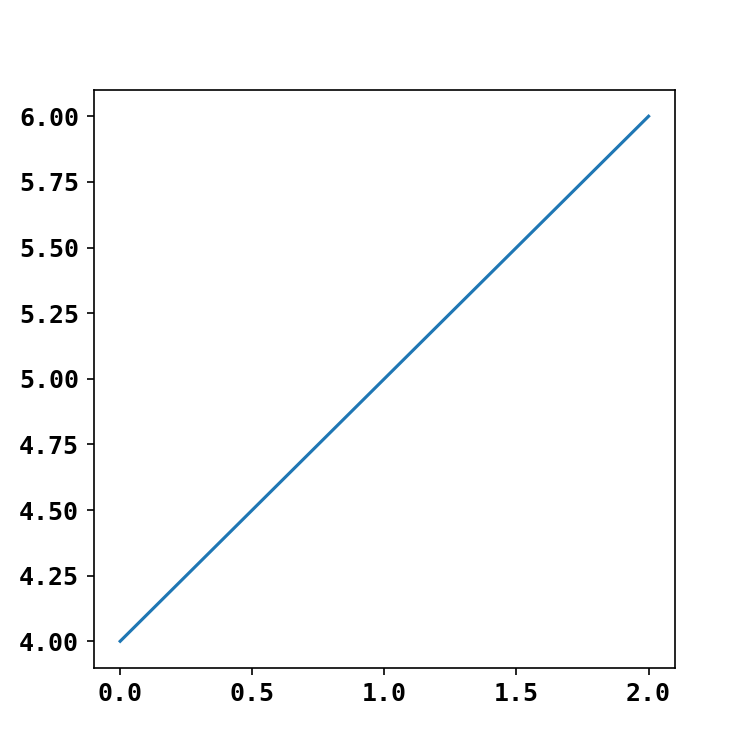

D:\Programs\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

In [63]:
#  创建多个图形
# 你可以通过使用递增图形编号多次调用figure()来创建多个图形。 当然，每个数字可以包含所需的轴和子图数量：

import matplotlib.pyplot as plt
plt.figure(21)                # 第一个图形
plt.subplot(211)             # 第一个图形的第一个子图
plt.plot([1, 2, 3])
plt.subplot(212)             # 第一个图形的第二个子图
plt.plot([4, 5, 6])


plt.figure(22)                # 第二个图形
plt.plot([4, 5, 6])          # 默认创建 subplot(111)

plt.figure(21)                # 当前是图形 1，subplot(212)
plt.subplot(211)             # 将第一个图形的 subplot(211) 设为当前子图
plt.title('Easy as 1, 2, 3') # 子图 211 的标题

3、处理文本

<IPython.core.display.Javascript object>


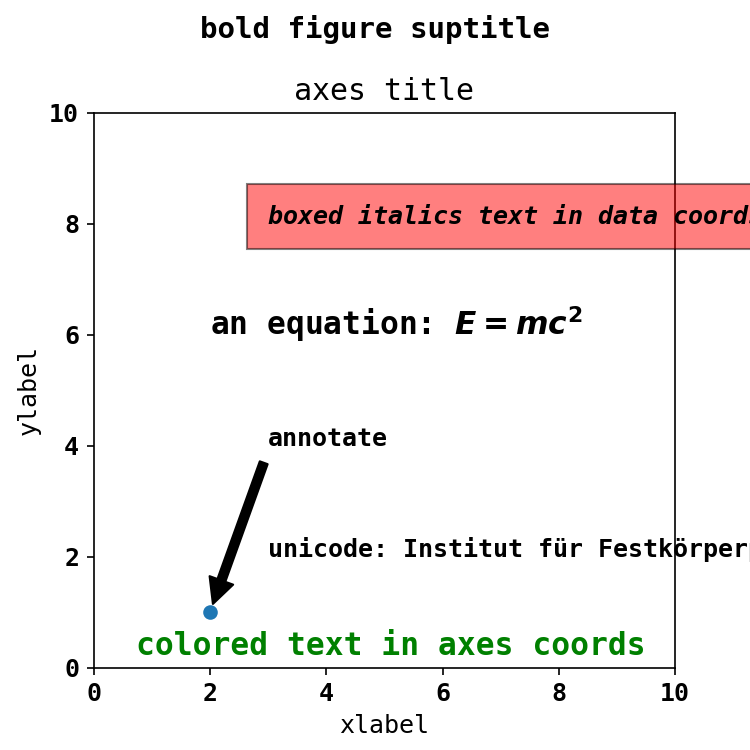

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

<IPython.core.display.Javascript object>


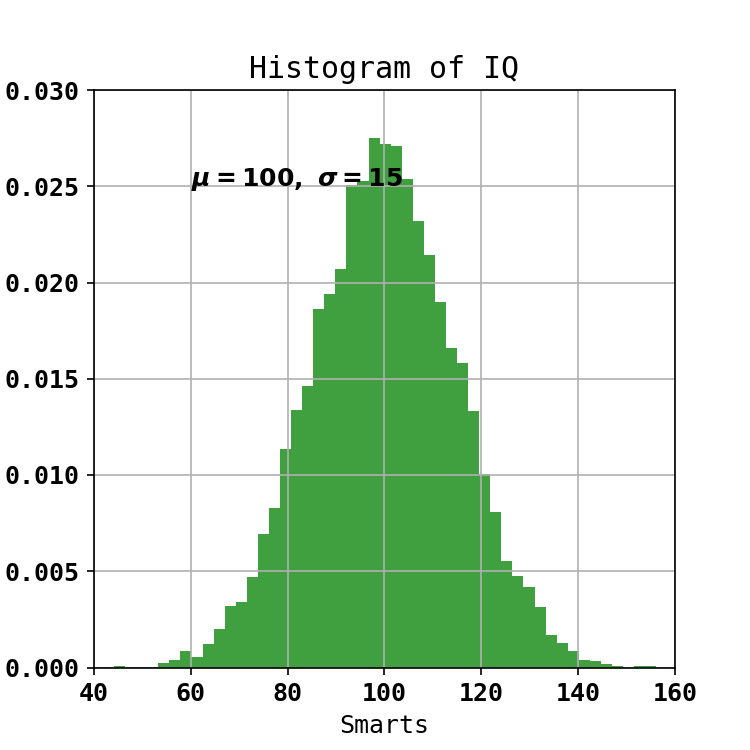

In [67]:


import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.figure()
# 数据的直方图
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()